In [131]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [132]:
img=cv2.imread('road.jpg')

In [133]:
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

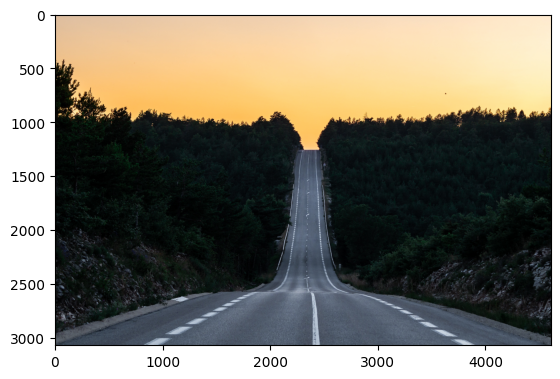

In [134]:
plt.imshow(rgb_img)

In [135]:
rgb_img.shape

(3072, 4608, 3)

In [136]:
#reshape to 2D
pixel_values=rgb_img.reshape((-1,3))
pixel_values.shape

(14155776, 3)

In [137]:
pixel_values=np.float32(pixel_values)

In [138]:
#define stopping criteria
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,0.95)

In [139]:
k=3
#Click shift +tab
_,labels,centers=cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [140]:
#convert back to 8 bit value to represent
centers=np.uint8(centers)# the three centroids
centers

array([[ 11,  17,  16],
       [ 80,  90, 104],
       [250, 210, 156]], dtype=uint8)

In [141]:
labels=labels.flatten()

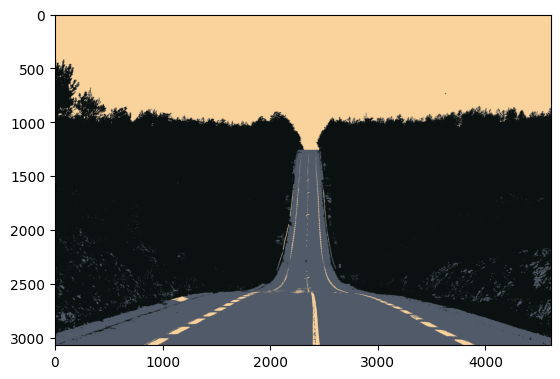

In [142]:
#I will assign a color for the pixels that close to each other in the color
segmented_image=centers[labels]
segmented_image=segmented_image.reshape(img.shape)
plt.imshow(segmented_image)

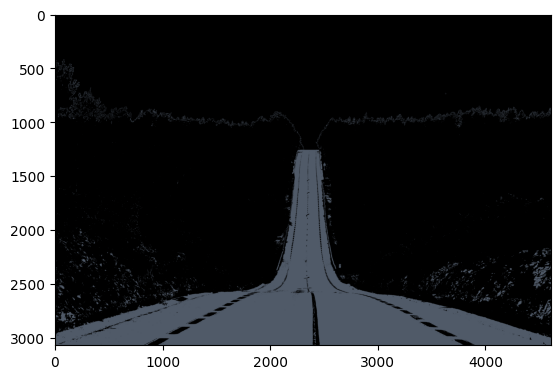

In [143]:
masked_img=np.copy(segmented_image)
masked_img=masked_img.reshape(-1,3)
cluster=1
masked_img[labels==0]=[0,0,0]
masked_img[labels==2]=[0,0,0]


masked_img=masked_img.reshape(img.shape)
plt.imshow(masked_img)

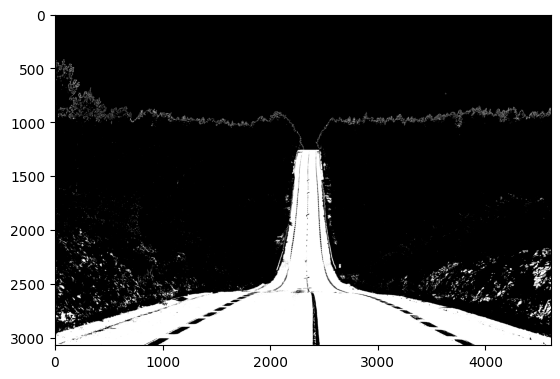

In [145]:
# and pixels below the threshold to 0.
threshold_value = 70
ret, thresholded = cv2.threshold(masked_img, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded)